In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [3]:
# Read the full_data.csv file
data = pd.read_csv('full_data.csv')

# Calculate average life expectancy by continent and year
avg_life_expectancy = data.groupby(['continent', 'Year'])['life_expectancy_index'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_life_expectancy, x='Year', y='life_expectancy_index', color='continent', barmode='group')

# Set the plot title and axis labels
fig.update_layout(title='Development of Average Life Expectancy by Continent',
                  xaxis_title='Year',
                  yaxis_title='Average Life Expectancy')

# Display the plot
fig.show()

In [8]:

continent_colors = {
    'Africa': '#AEFD8E',
    'Asia': '#FAA598',
    'Europe': '#E3C97F',
    'North America': '#B47FE3',
    'Australia': '#B2E4FA',
    'South America': '#E8EAC8'
}

avg_happiness = data.groupby(['continent', 'Year'])['happiness_score'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_happiness, x='Year', y='happiness_score', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of Average Happiness Score by Continent',
    xaxis_title='Year',
    yaxis_title='Average Happiness',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))


fig.show()

avg_gni = data.groupby(['continent', 'Year'])['GNI_per_capita_PPP'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_gni, x='Year', y='GNI_per_capita_PPP', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of GNI per capita (PPP) by Continent',
    xaxis_title='Year',
    yaxis_title='Average contribution',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))

fig.show()

### GDP contribution to happiness

The above two histograms can support both sides of the argument. While it supports the claim that 'wealthier' countries are also happier countries for the top three richest and happiest continents (Oceania, Europe and North America), the histograms also show that the contribution of GDP per capita is not a definitive factor in happiness. This supported by the fact that South America is happier than Asia in every year while also coming close to Europe in happiness. On the contrary South America is, on average, poorer than Asia in every year and substantially poorer than Europe. Another observation that supportss the claim that happiness is not necessarily related with wealth is the fact that the average contribution of GDP to happiness of all continents shrank from 2015 to 2018, while the average happiness of every continent remained pretty much constant throughout the same years.


In [ ]:
# Sort the data by 'Year' column in descending order
data = data.sort_values('Year', ascending=True)

# Create a scatter plot for all available years using Plotly, with two plots per row
fig = px.scatter(data, x='GNI_per_capita_PPP', y='HDI_calculated', color='continent',
                 color_discrete_map=continent_colors, hover_data=['Country'], facet_row='Year')

# Set the plot title and axis labels
fig.update_layout(
    title='Scatter Plot of HDI Calculated vs GNI per Capita (PPP) by Year',
    xaxis_title='GNI per Capita (PPP)',
    yaxis_title='HDI Calculated',
    height=1000,  
    width = 800
)

# Set the hover label format
fig.update_traces(hovertemplate='Country: %{customdata[0]}<br>GNI per Capita (PPP): %{x}<br>HDI Calculated: %{y}')

# Show the plot
fig.show()



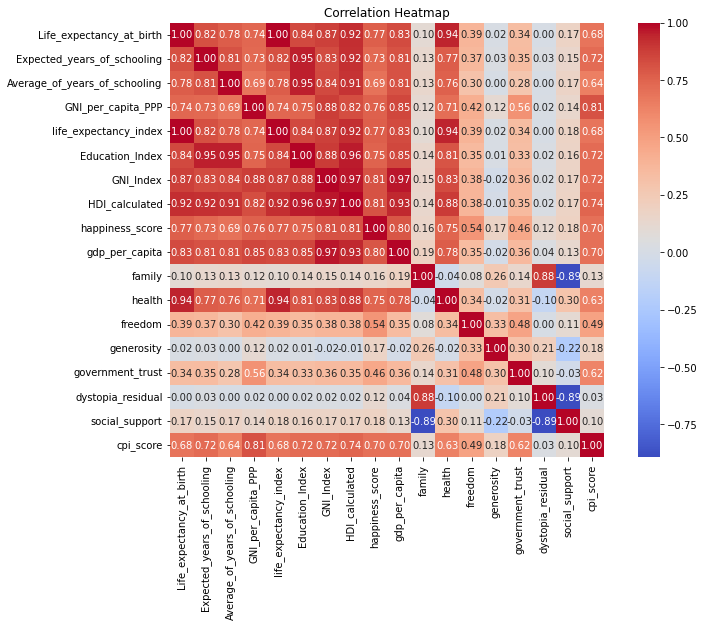

In [ ]:
# Select the variables of interest for the heatmap
variables = ['Life_expectancy_at_birth', 'Expected_years_of_schooling', 'Average_of_years_of_schooling',
             'GNI_per_capita_PPP', 'life_expectancy_index', 'Education_Index', 'GNI_Index', 'HDI_calculated',
             'happiness_score', 'gdp_per_capita', 'family', 'health', 'freedom', 'generosity',
             'government_trust', 'dystopia_residual', 'social_support', 'cpi_score']

# Create a correlation matrix
correlation_matrix = data[variables].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

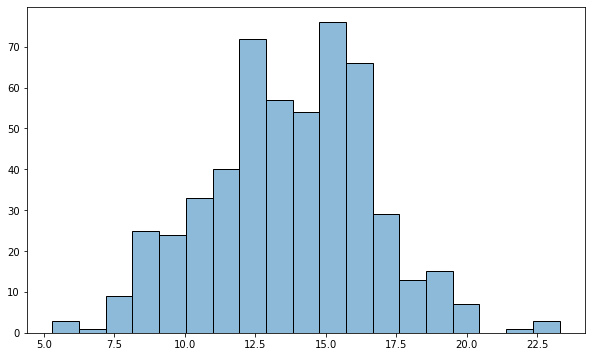

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Expected_years_of_schooling', kde=True)

# Set the title and labels
plt.title(f'Distribution of expected_years_of_schooling')
plt.xlabel('expected_years_of_schooling')
plt.ylabel('Count')

# Display the histogram
plt.show()

In [ ]:
### Does a good education give government trust?

# This 3d Scatter Plot is multivariate and shows on the x-axis the 'Education Index', on the y-axis the 'Government Trust' and on the z-axis the 'CPI Score'. CPI stands for 'Corruption Perception Index', the lower the CPI index, the more the people believe there is corruption in their country. The size of the plot-points shows the GDP per capita. 

# The 3D scatter plot reveals interesting insights about the correlation between the Corruption Perception Index (CPI) score and other variables across countries. A positive correlation between the CPI score and variables such as Education Index and Government trust suggests that countries with higher levels of corruption tend to exhibit lower values in education, government trust, and economic prosperity. Conversely, a negative correlation indicates that countries with lower corruption levels tend to have higher education indices and greater levels of government trust. This visualization highlights the importance of addressing corruption to foster positive development in education and trust within countries. 

# The Education Index plays a significant role in shaping the relationships between various variables across countries and continents. A positive correlation between the Education Index and variables such as Government trust, GDP per capita, and possibly the Corruption Perception Index suggests that countries with higher education indices tend to exhibit greater levels of government trust and economic prosperity while combating corruption. Furthermore, the Education Index may influence the disparities observed between countries and continents. Nations with higher education indices are more likely to invest in quality education, leading to better governance, higher economic output, and potentially lower corruption levels. Thus, enhancing education systems becomes vital for promoting positive development and reducing inequality among countries and continents.

# Overall it gives the visualisation that countries with a higher inducation index tend to have more goverment trust and a higher CPI score. This is probaply because people that live in a country that is able to give a good education tend to trust the goverment more than people that don't recieved good education. # Sort the data by 'Year' column in descending order
data = data.sort_values('Year', ascending=True)

# Create a scatter plot for all available years using Plotly, with two plots per row
fig = px.scatter(data, x='happiness_score', y='GNI_per_capita_PPP', color='continent',
                 color_discrete_map=continent_colors, hover_data=['Country'], facet_row='Year')

# Set the plot title and axis labels
fig.update_layout(
    title='Scatter Plot of GNI per Capita (PPP) vs Happiness by Year',
    xaxis_title='Happiness score',
    yaxis_title='GNI per Capita (PPP)',
    height=1000,  
    width = 800,
    plot_bgcolor='rgb(240, 240, 240, 240)'
)

# Set the hover label format
fig.update_traces(hovertemplate='Country: %{customdata[0]}<br>Happines: %{x}<br>GNI per Capita (PPP): %{y}')

# Show the plot
fig.show()



While these scatterplots show that having a 'richer' population (measured with GNI_per_capita adjusted for PPP) is generally related with having a happier population. These scatterplots also show that countries with a poorer population can still have happier population. This is exemplified by the fact that a country like Mexico has a much poorer population than a country like Singapore (which has by far the richest population) while their happiness scores are pretty much equal to each other. Furthermore, these scatterplots show that most countries move stronger along the x-axis than along the y-axis, this means that countries can become happier or unhappier regardless of the economic wealth of their citizens. Kuwait, however shows the exact opposite side of this phenomenon, they show great growth in their GNI per capita while their happiness scores do not increase or decrease drastically. 

In [ ]:
# ### Does a good education give government trust?

# This 3d Scatter Plot is multivariate and shows on the x-axis the 'Education Index', on the y-axis the 'Government Trust' and on the z-axis the 'CPI Score'. CPI stands for 'Corruption Perception Index', the lower the CPI index, the more the people believe there is corruption in their country. The size of the plot-points shows the GDP per capita. 

# The 3D scatter plot reveals interesting insights about the correlation between the Corruption Perception Index (CPI) score and other variables across countries. A positive correlation between the CPI score and variables such as Education Index and Government trust suggests that countries with higher levels of corruption tend to exhibit lower values in education, government trust, and economic prosperity. Conversely, a negative correlation indicates that countries with lower corruption levels tend to have higher education indices and greater levels of government trust. This visualization highlights the importance of addressing corruption to foster positive development in education and trust within countries. 

# The Education Index plays a significant role in shaping the relationships between various variables across countries and continents. A positive correlation between the Education Index and variables such as Government trust, GDP per capita, and possibly the Corruption Perception Index suggests that countries with higher education indices tend to exhibit greater levels of government trust and economic prosperity while combating corruption. Furthermore, the Education Index may influence the disparities observed between countries and continents. Nations with higher education indices are more likely to invest in quality education, leading to better governance, higher economic output, and potentially lower corruption levels. Thus, enhancing education systems becomes vital for promoting positive development and reducing inequality among countries and continents.

# Overall it gives the visualisation that countries with a higher inducation index tend to have more goverment trust and a higher CPI score. This is probaply because people that live in a country that is able to give a good education tend to trust the goverment more than people that don't recieved good education. 
# Create a scatter plot using Plotly with colors based on continent
fig = px.scatter(data_frame=data, x='gdp_per_capita', y='GNI_per_capita_PPP', color='continent',
                 color_discrete_map=continent_colors, hover_name='Country')

fig.update_layout(
    xaxis_title='GDP per Capita',
    yaxis_title='GNI per Capita (PPP)',
    title='Relationship between GDP per Capita and GNI per Capita (PPP)'
)

# Show the plot
fig.show()

In [27]:
import plotly.graph_objects as go

# Iterate over the years in your dataset
for year in data['Year'].unique():
    # Filter the data for the current year
    year_data = data[data['Year'] == year]

    # Create a new figure for the current year
    fig = go.Figure(go.Choropleth(
        locations = year_data['Country'],
        z = year_data['GNI_per_capita_PPP'],
        locationmode = 'country names',
        colorscale = 'deep',
        colorbar = dict(title = 'GNI per capita (PPP)')
    ))

    # Set the layout properties for the current year
    fig.update_layout(
        title_text = f'Globe Visualization for Year {year}',
        geo = dict(
            projection_type = "natural earth",
            showcountries = True
        ),
        height = 300,
        margin = dict(r=0, t=0, l=0, b=0)
    )

    # Show the plot for the current year
    fig.show()
